In [47]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import scanpy as sc
import pandas as pd
import anndata as ad

import morphelia
from morphelia.tools import LoadPlate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Morphelia
### Morphological single cell analysis in python

## Step 1: Load Cellprofiler output into an annotated dataset

If used "ExportToSpreadSheet" module, the output directory contains a .csv-file for every mask
with a row per sample and features as columns.
We want to merge the information about nuclei, cells and cytoplasm (that we got from their
respective mask) and store morphological features along with cell annotations (like plate name,
well, field, etc.).

AnnData is a popular library for single cell analysis, typically single-cell RNA-sequencing.
It uses HDF5 as dataformat. More information here: https://anndata.readthedocs.io/en/stable/index.html


In [3]:
# path to plate directory
path = '../data/cp_output/'

plate = LoadPlate(path,
                  obj_sfx=".txt",   # --> suffix
                  obj_delimiter="\t",   # --> delimiter of values
                  treat_file="Treatment")   # --> name of treatment file

plate.load()    # --> merge and load to pandas
plate = plate.to_anndata()  # --> convert to anndata

C:\Users\amarx\Anaconda3\envs\morphelia\lib\site-packages\anndata\_core\anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Let's visualize our AnnData object. We have 477 cells and 2961 features.
The observations (obs) indicate our annotations.

In [4]:
plate

AnnData object with n_obs × n_vars = 477 × 2961
    obs: 'ImageNumber', 'ObjectNumber', 'Metadata_Col', 'Metadata_Field', 'Metadata_FileLocation', 'Metadata_Frame', 'Metadata_Row', 'Metadata_Series', 'Metadata_Well', 'Cells_AreaShape_BoundingBoxArea', 'Cells_AreaShape_BoundingBoxMaximum_X', 'Cells_AreaShape_BoundingBoxMaximum_Y', 'Cells_AreaShape_BoundingBoxMinimum_X', 'Cells_AreaShape_BoundingBoxMinimum_Y', 'Cells_AreaShape_Center_X', 'Cells_AreaShape_Center_Y', 'Cells_AreaShape_EulerNumber', 'Cells_Children_Cytoplasm_Count', 'Cells_Children_Nuc_1_Count', 'Cells_Children_Nuclei_Count', 'Cells_Children_Primarieswithoutborder_Count', 'Cells_Children_Primarieswithoutborder_Count.1', 'Cells_Location_CenterMassIntensity_X_Actin', 'Cells_Location_CenterMassIntensity_X_Brightfield', 'Cells_Location_CenterMassIntensity_X_DNA', 'Cells_Location_CenterMassIntensity_X_Desmin', 'Cells_Location_CenterMassIntensity_X_PC', 'Cells_Location_CenterMassIntensity_Y_Actin', 'Cells_Location_CenterMassIntens

The annotations are stored as pandas DataFrame, all other values are stored as a Numpy array.
We can get the annotations and values as following:

In [5]:
# annotations
plate.obs.head()

,ImageNumber,ObjectNumber,Metadata_Col,Metadata_Field,Metadata_FileLocation,Metadata_Frame,Metadata_Row,Metadata_Series,Metadata_Well,Cells_AreaShape_BoundingBoxArea,...,Cytoplasm_Location_MaxIntensity_Z_Brightfield,Cytoplasm_Location_MaxIntensity_Z_DNA,Cytoplasm_Location_MaxIntensity_Z_Desmin,Cytoplasm_Location_MaxIntensity_Z_PC,Cytoplasm_Number_Object_Number,Cytoplasm_Parent_Cells,Cytoplasm_Parent_Primarieswithoutborder,Metadata_Treatment,Metadata_Concentration,Metadata_Unit
0,1,1,3,6,NaN,0,E,0,E3,9044,...,0.0,0.0,0.0,0.0,1,1,1,Pe,0.001,mg/ml
1,1,2,3,6,NaN,0,E,0,E3,16093,...,0.0,0.0,0.0,0.0,2,2,2,Pe,0.001,mg/ml
2,1,3,3,6,NaN,0,E,0,E3,15456,...,0.0,0.0,0.0,0.0,3,3,3,Pe,0.001,mg/ml
3,1,4,3,6,NaN,0,E,0,E3,15232,...,0.0,0.0,0.0,0.0,4,4,4,Pe,0.001,mg/ml
4,1,5,3,6,NaN,0,E,0,E3,14940,...,0.0,0.0,0.0,0.0,5,5,5,Pe,0.001,mg/ml


In [6]:
# values
plate.X

array([[4.92600000e+03, 2.03454280e+00, 8.00544560e-01, ...,
        8.68238322e-03, 1.29114211e-01, 6.12741292e-01],
       [9.32800000e+03, 1.90278614e+00, 7.68818259e-01, ...,
        8.51453468e-03, 9.40871313e-02, 6.02670312e-01],
       [9.46200000e+03, 2.28528094e+00, 8.81704628e-01, ...,
        8.34668521e-03, 6.98977634e-02, 5.88120878e-01],
       ...,
       [5.29400000e+03, 1.79038346e+00, 8.93598557e-01, ...,
        1.79789420e-02, 2.43095294e-01, 7.64938593e-01],
       [3.34600000e+03, 1.45021796e+00, 7.79904485e-01, ...,
        1.30769815e-02, 1.53440908e-01, 7.59849727e-01],
       [5.78600000e+03, 2.22282672e+00, 9.32412803e-01, ...,
        1.34393834e-02, 1.65487900e-01, 7.34824896e-01]], dtype=float32)

In [7]:
# feature names
plate.var

""
Cells_AreaShape_Area
Cells_AreaShape_Compactness
Cells_AreaShape_Eccentricity
Cells_AreaShape_EquivalentDiameter
Cells_AreaShape_Extent
...
Cytoplasm_Intensity_UpperQuartileIntensity_Actin
Cytoplasm_Intensity_UpperQuartileIntensity_Brightfield
Cytoplasm_Intensity_UpperQuartileIntensity_DNA
Cytoplasm_Intensity_UpperQuartileIntensity_Desmin


AnnData was build together with Scanpy (short for single cell analysis in python), another
useful library we use. It contains functions for preprocessing, analysis and plotting.
Even if a lot of functions were originally build for single-cell RNA-sequencing, we can also
use them for image-based profiling.
More information here: https://scanpy.readthedocs.io/en/stable/index.html

Let's use Scanpy to plot some feature distributions.

In [11]:
# list feature names
plate.var_names

Index(['Cells_AreaShape_Area', 'Cells_AreaShape_Compactness',
       'Cells_AreaShape_Eccentricity', 'Cells_AreaShape_EquivalentDiameter',
       'Cells_AreaShape_Extent', 'Cells_AreaShape_FormFactor',
       'Cells_AreaShape_MajorAxisLength', 'Cells_AreaShape_MaxFeretDiameter',
       'Cells_AreaShape_MaximumRadius', 'Cells_AreaShape_MeanRadius',
       ...
       'Cytoplasm_Intensity_StdIntensity_Actin',
       'Cytoplasm_Intensity_StdIntensity_Brightfield',
       'Cytoplasm_Intensity_StdIntensity_DNA',
       'Cytoplasm_Intensity_StdIntensity_Desmin',
       'Cytoplasm_Intensity_StdIntensity_PC',
       'Cytoplasm_Intensity_UpperQuartileIntensity_Actin',
       'Cytoplasm_Intensity_UpperQuartileIntensity_Brightfield',
       'Cytoplasm_Intensity_UpperQuartileIntensity_DNA',
       'Cytoplasm_Intensity_UpperQuartileIntensity_Desmin',
       'Cytoplasm_Intensity_UpperQuartileIntensity_PC'],
      dtype='object', length=2961)

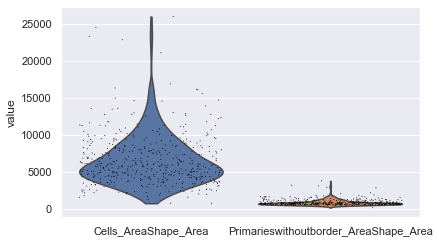

In [14]:
# violing plot
sc.pl.violin(plate, ['Cells_AreaShape_Area', 'Primarieswithoutborder_AreaShape_Area'],
             jitter=0.4)

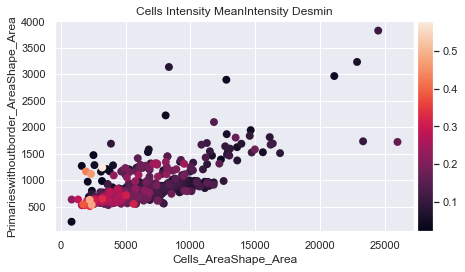

In [18]:
sc.pl.scatter(plate, x='Cells_AreaShape_Area', y='Primarieswithoutborder_AreaShape_Area',
              color='Cells_Intensity_MeanIntensity_Desmin')


## Step 2: Preprocessing

This includes the following steps:

* filter dead cells and cells that have Nan-values for important features
    * dead cells a low Cell Area - Nuclei Area ratio
* drop features that contain Nan-values
* drop features that are duplicates of other features
* drop invariant features
* normalize the data

7 cells filtered


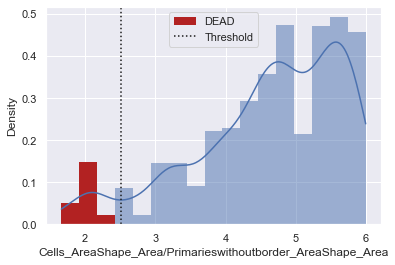

In [22]:
# filter dead cells
plate = morphelia.pp.filter_debris(plate, show=True, verbose=True,
                                   max_quot=6)

In [23]:
# variables that should not contain any nan values
not_nan = ['Cells_AreaShape_Area', 'Cytoplasm_AreaShape_Area', 'Primarieswithoutborder_AreaShape_Area',
           'Cytoplasm_AreaShape_FormFactor']

len_before = len(plate)
plate = plate[~np.isnan(plate[:, not_nan].X).any(axis=1), :].copy()
plate = plate[~np.isinf(plate[:, not_nan].X).any(axis=1), :].copy()
print(f"{len_before - len(plate)} cells with nan values dropped")

0 cells with nan values dropped


In [24]:


plate = morphelia.pp.drop_nan(plate, verbose=True)
plate = morphelia.pp.drop_duplicates(plate, verbose=True)
plate = morphelia.pp.drop_invariant(plate, verbose=True)

Dropped 317 duplicated features: Index(['Cells_Granularity_10_Actin.1', 'Cells_Granularity_10_Brightfield.1',
       'Cells_Granularity_10_DNA.1', 'Cells_Granularity_10_Desmin.1',
       'Cells_Granularity_10_PC.1', 'Cells_Granularity_11_Actin.1',
       'Cells_Granularity_11_Brightfield.1', 'Cells_Granularity_11_DNA.1',
       'Cells_Granularity_11_Desmin.1', 'Cells_Granularity_11_PC.1',
       ...
       'Primarieswithoutborder_Granularity_9_Desmin.1',
       'Primarieswithoutborder_Granularity_9_PC.1',
       'Primarieswithoutborder_RadialDistribution_ZernikePhase_Actin_0_0',
       'Primarieswithoutborder_RadialDistribution_ZernikePhase_Brightfield_0_0',
       'Primarieswithoutborder_RadialDistribution_ZernikePhase_DNA_0_0',
       'Primarieswithoutborder_RadialDistribution_ZernikePhase_DNA_2_0',
       'Primarieswithoutborder_RadialDistribution_ZernikePhase_Desmin_0_0',
       'Primarieswithoutborder_RadialDistribution_ZernikePhase_PC_0_0',
       'Cytoplasm_Intensity_MinIntensit

In [25]:
plate = morphelia.pp.normalize(plate, method='standard',
                               by=None,
                               verbose=True)

## Step 3: Feature extraction

In [26]:
plate = morphelia.ft.drop_noise(plate, verbose=True)


Drop 2349 noisy features: Index(['Primarieswithoutborder_RadialDistribution_ZernikePhase_Brightfield_9_1',
       'Cells_RadialDistribution_ZernikePhase_DNA_8_8',
       'Primarieswithoutborder_RadialDistribution_ZernikePhase_Desmin_5_5',
       'Cells_RadialDistribution_ZernikePhase_PC_7_1',
       'Primarieswithoutborder_RadialDistribution_ZernikePhase_PC_4_2',
       'Primarieswithoutborder_RadialDistribution_ZernikePhase_Actin_1_1',
       'Cells_RadialDistribution_ZernikePhase_PC_5_3',
       'Cells_RadialDistribution_ZernikePhase_PC_8_6',
       'Primarieswithoutborder_RadialDistribution_ZernikePhase_Actin_9_9',
       'Cells_RadialDistribution_ZernikePhase_Desmin_5_3',
       ...
       'Primarieswithoutborder_Texture_SumVariance_PC_10_03_256',
       'Cytoplasm_Intensity_IntegratedIntensity_PC',
       'Primarieswithoutborder_Texture_SumVariance_PC_10_00_256',
       'Primarieswithoutborder_Texture_SumVariance_PC_3_03_256',
       'Primarieswithoutborder_Texture_SumVariance_PC_

In [27]:
plate = morphelia.ft.drop_near_zero_variance(plate, verbose=True)


Iterating over features: 100%|██████████| 294/294 [00:02<00:00, 102.81it/s]

Drop 19 features with low variance: ['Primarieswithoutborder_Granularity_13_DNA', 'Primarieswithoutborder_Granularity_23_DNA', 'Cells_Granularity_23_Brightfield', 'Primarieswithoutborder_Granularity_28_DNA', 'Cells_Granularity_29_DNA', 'Cells_Granularity_26_PC', 'Primarieswithoutborder_RadialDistribution_ZernikePhase_Brightfield_2_0', 'Cells_RadialDistribution_ZernikePhase_Actin_2_0', 'Primarieswithoutborder_Granularity_26_DNA', 'Cells_Granularity_26_DNA', 'Cells_RadialDistribution_ZernikePhase_Desmin_2_0', 'Cells_Granularity_23_DNA', 'Primarieswithoutborder_Granularity_3_Brightfield', 'Cells_Granularity_28_DNA', 'Cells_RadialDistribution_ZernikePhase_DNA_2_0', 'Primarieswithoutborder_Granularity_23_PC', 'Primarieswithoutborder_Granularity_29_DNA', 'Primarieswithoutborder_Granularity_23_Brightfield', 'Primarieswithoutborder_Granularity_26_PC']


In [28]:
plate = morphelia.ft.drop_outlier(plate, thresh=10, verbose=True)

Drop 24 features with outlier values: Index(['Cells_Texture_AngularSecondMoment_PC_20_01_256',
       'Cells_Texture_AngularSecondMoment_Actin_20_01_256',
       'Cells_Texture_AngularSecondMoment_Desmin_20_01_256',
       'Cells_Texture_AngularSecondMoment_Brightfield_20_01_256',
       'Primarieswithoutborder_Texture_AngularSecondMoment_DNA_10_01_256',
       'Primarieswithoutborder_Texture_AngularSecondMoment_Brightfield_10_01_256',
       'Primarieswithoutborder_Texture_Variance_Desmin_3_03_256',
       'Primarieswithoutborder_Texture_Variance_Desmin_10_00_256',
       'Primarieswithoutborder_Texture_Variance_Desmin_3_02_256',
       'Primarieswithoutborder_Texture_Variance_Desmin_3_01_256',
       'Primarieswithoutborder_Texture_Variance_Desmin_3_00_256',
       'Primarieswithoutborder_Texture_Variance_Desmin_10_02_256',
       'Primarieswithoutborder_Texture_Variance_Desmin_10_01_256',
       'Primarieswithoutborder_Texture_Variance_Desmin_10_03_256',
       'Primarieswithoutbord

In [29]:
plate = morphelia.ft.drop_highly_correlated(plate, verbose=True, show=True)

Dropped 178 features: Index(['Primarieswithoutborder_Texture_InfoMeas1_Desmin_3_00_256',
       'Primarieswithoutborder_Texture_InfoMeas1_Desmin_10_02_256',
       'Primarieswithoutborder_Texture_InfoMeas1_Desmin_3_02_256',
       'Primarieswithoutborder_Texture_InfoMeas1_Desmin_3_01_256',
       'Primarieswithoutborder_Texture_InfoMeas1_Desmin_10_01_256',
       'Primarieswithoutborder_Texture_InfoMeas1_Desmin_10_00_256',
       'Cells_Texture_InfoMeas1_Desmin_3_01_256',
       'Cells_Texture_InfoMeas1_Desmin_3_03_256',
       'Primarieswithoutborder_Texture_InfoMeas1_Desmin_3_03_256',
       'Cells_Texture_InfoMeas1_Desmin_10_02_256',
       ...
       'Cells_Texture_SumVariance_Desmin_10_01_256',
       'Cells_Texture_Contrast_Desmin_20_03_256',
       'Cells_Texture_SumVariance_Desmin_10_00_256',
       'Cells_Texture_SumVariance_Desmin_10_02_256',
       'Cells_Intensity_IntegratedIntensity_Actin',
       'Cells_Texture_SumVariance_Desmin_3_03_256',
       'Cells_Texture_SumVarian

In [30]:
plate

AnnData object with n_obs × n_vars = 468 × 73
    obs: 'ImageNumber', 'ObjectNumber', 'Metadata_Col', 'Metadata_Field', 'Metadata_FileLocation', 'Metadata_Frame', 'Metadata_Row', 'Metadata_Series', 'Metadata_Well', 'Cells_AreaShape_BoundingBoxArea', 'Cells_AreaShape_BoundingBoxMaximum_X', 'Cells_AreaShape_BoundingBoxMaximum_Y', 'Cells_AreaShape_BoundingBoxMinimum_X', 'Cells_AreaShape_BoundingBoxMinimum_Y', 'Cells_AreaShape_Center_X', 'Cells_AreaShape_Center_Y', 'Cells_AreaShape_EulerNumber', 'Cells_Children_Cytoplasm_Count', 'Cells_Children_Nuc_1_Count', 'Cells_Children_Nuclei_Count', 'Cells_Children_Primarieswithoutborder_Count', 'Cells_Children_Primarieswithoutborder_Count.1', 'Cells_Location_CenterMassIntensity_X_Actin', 'Cells_Location_CenterMassIntensity_X_Brightfield', 'Cells_Location_CenterMassIntensity_X_DNA', 'Cells_Location_CenterMassIntensity_X_Desmin', 'Cells_Location_CenterMassIntensity_X_PC', 'Cells_Location_CenterMassIntensity_Y_Actin', 'Cells_Location_CenterMassIntensit

We reduced the features from 2961 to 73.

## Step 4: Downstream Analysis

This includes for example:
* Principal Component Analysis
* Manifold Learning (UMAP, t-SNE)

In [31]:
# calculate PCA
sc.tl.pca(plate)


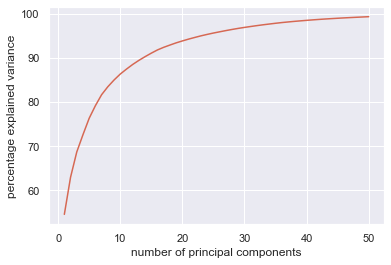

In [32]:
# plot the variance ratio
morphelia.pl.pca_variance_ratio(plate)


The first 20 compoinents cover ~95% of the variance.

In [33]:
# calculate k-nn graph
sc.pp.neighbors(plate, n_neighbors=8, n_pcs=20)

In [34]:
# calculate UMAP
sc.tl.umap(plate)

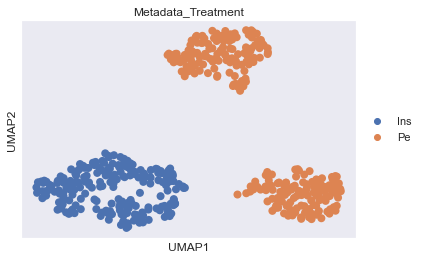

In [35]:
# Plot UMAP
sc.pl.umap(plate, color="Metadata_Treatment")


## Aggregation

Often, only aggregated profiles, so-called consensus profiles, are used for
downstream analysis. Aggregation can be done per well or treatment by mean or
median aggregation.

In [40]:

plate_agg = morphelia.pp.aggregate(plate, by='Metadata_Well')
plate_agg


C:\Users\amarx\Anaconda3\envs\morphelia\lib\site-packages\anndata\_core\anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 2 × 73
    obs: 'ImageNumber', 'ObjectNumber', 'Metadata_Col', 'Metadata_Field', 'Metadata_FileLocation', 'Metadata_Frame', 'Metadata_Row', 'Metadata_Series', 'Metadata_Well', 'Cells_AreaShape_BoundingBoxArea', 'Cells_AreaShape_BoundingBoxMaximum_X', 'Cells_AreaShape_BoundingBoxMaximum_Y', 'Cells_AreaShape_BoundingBoxMinimum_X', 'Cells_AreaShape_BoundingBoxMinimum_Y', 'Cells_AreaShape_Center_X', 'Cells_AreaShape_Center_Y', 'Cells_AreaShape_EulerNumber', 'Cells_Children_Cytoplasm_Count', 'Cells_Children_Nuc_1_Count', 'Cells_Children_Nuclei_Count', 'Cells_Children_Primarieswithoutborder_Count', 'Cells_Children_Primarieswithoutborder_Count.1', 'Cells_Location_CenterMassIntensity_X_Actin', 'Cells_Location_CenterMassIntensity_X_Brightfield', 'Cells_Location_CenterMassIntensity_X_DNA', 'Cells_Location_CenterMassIntensity_X_Desmin', 'Cells_Location_CenterMassIntensity_X_PC', 'Cells_Location_CenterMassIntensity_Y_Actin', 'Cells_Location_CenterMassIntensity_

### Feature clustering

In [53]:
feature_tags = {'AreaShape': 1,
                'Intensity': 2,
                'Texture': 3,
                'Granularity': 4}

feature_classes = []
for feat in plate.var_names:
    if any(tag in feat for tag in feature_tags.keys()):
        for tag in feature_tags.keys():
            if tag in feat:
                feature_classes.append(feature_tags[tag])
                break
    else:
        feature_classes.append(0)


In [63]:
# make new transposed anndata object
obs = pd.DataFrame({'name': plate.var_names,
                    'feature_class': feature_classes})
obs['feature_class'] = obs['feature_class'].astype('category')
var = pd.DataFrame(index=np.arange(len(plate)))

feat_data = ad.AnnData(X=plate.X.T, obs=obs, var=var)
feat_data

C:\Users\amarx\Anaconda3\envs\morphelia\lib\site-packages\anndata\_core\anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 73 × 468
    obs: 'name', 'feature_class'

In [64]:
# calculate PCA
sc.tl.pca(feat_data)


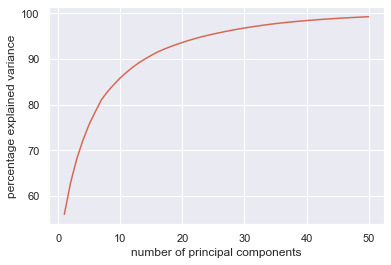

In [65]:
# plot the variance ratio
morphelia.pl.pca_variance_ratio(feat_data)


The first 20 compoinents cover ~95% of the variance.

In [66]:
# calculate k-nn graph
sc.pp.neighbors(feat_data, n_neighbors=8, n_pcs=20)

In [67]:
# calculate UMAP
sc.tl.umap(feat_data)

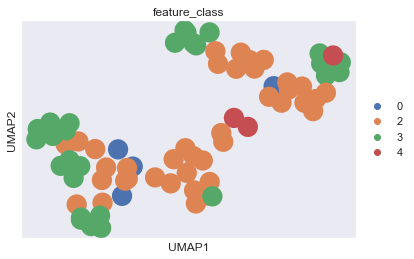

In [68]:
# Plot UMAP
sc.pl.umap(feat_data, color="feature_class")